In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
df=pd.read_csv("survey.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
column_needed=df.loc[:,["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]]
column_needed=column_needed.rename({"ConvertedComp":"Salary"},axis=1)

In [5]:
column_needed.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [6]:
column_needed.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [7]:
column_needed=column_needed[~column_needed["Salary"].isnull()]

In [8]:
column_needed.isnull().sum()

Country           0
EdLevel         568
YearsCodePro    135
Employment       39
Salary            0
dtype: int64

In [9]:
column_needed.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [10]:
column_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [11]:
column_needed=column_needed.dropna()

In [12]:
column_needed.isnull().sum()


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [13]:
column_needed.shape

(34025, 5)

In [14]:
column_needed= column_needed[column_needed["Employment"]=="Employed full-time"]

column_needed=column_needed.drop("Employment",axis=1)
column_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [15]:
column_needed["Country"].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Turkmenistan         1
Namibia              1
Yemen                1
Andorra              1
Belize               1
Name: Country, Length: 154, dtype: int64

In [16]:
def join_country(cat,cutoff):
    cat_join={}
    for i in cat.index:
        if cat[i]>=cutoff:
            cat_join[i]=i

        else:
            cat_join[i]="others"
    return cat_join
            

In [17]:
country_map=join_country(column_needed["Country"].value_counts(),400)

In [18]:
column_needed["Country"]=column_needed["Country"].map(country_map)
column_needed["Country"].value_counts()

others                8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

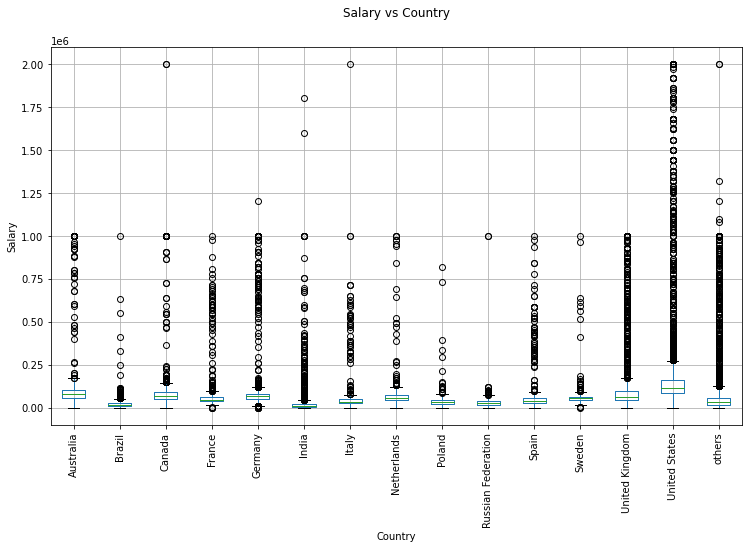

In [19]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
column_needed.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary vs Country")
plt.ylabel("Salary")
plt.title("")
plt.xticks(rotation=90)
plt.show()

In [20]:
column_needed=column_needed[column_needed["Salary"]<=250000]
column_needed=column_needed[column_needed["Salary"]>10000]
column_needed=column_needed[column_needed["Country"]!="others"]


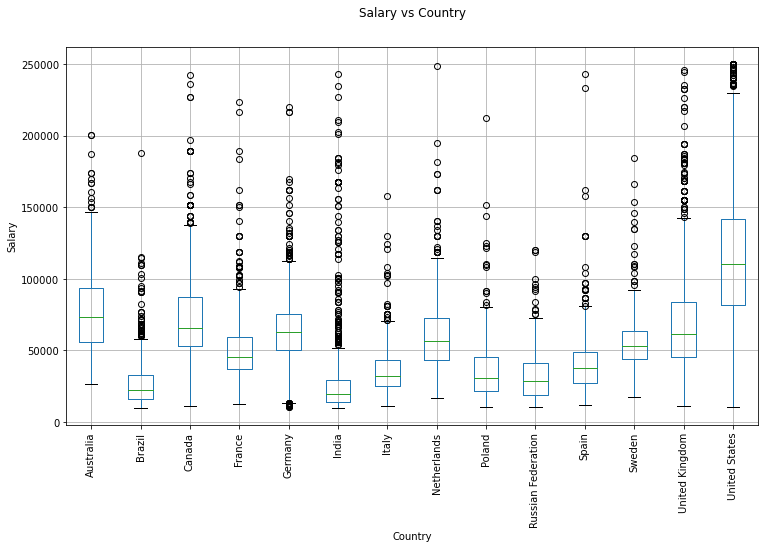

In [21]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
column_needed.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary vs Country")
plt.ylabel("Salary")
plt.title("")
plt.xticks(rotation=90)
plt.show()

In [22]:
column_needed["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [23]:
def clean_experience(x):
    if x=="More than 50 years":
        return 50
    if x=="Less than 1 year":
        return 0.5
    return float(x)

In [24]:
column_needed["YearsCodePro"]=column_needed["YearsCodePro"].apply(clean_experience)

In [25]:
column_needed["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [26]:
column_needed["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [27]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree" 
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or "Other doctoral" in x:
            return "Post grad"
    return "Less than a Bachelors"

In [28]:
column_needed["EdLevel"]=column_needed["EdLevel"].apply(clean_education)

In [29]:
column_needed["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [30]:
trans_edu=LabelEncoder()
trans_edu.fit(column_needed["EdLevel"])
column_needed["EdLevel"]=trans_edu.transform(column_needed["EdLevel"])

In [31]:
trans_count=LabelEncoder()
trans_count.fit(column_needed["Country"])
column_needed["Country"]=trans_count.transform(column_needed["Country"])

In [32]:
column_needed["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [33]:
features=column_needed.drop("Salary",axis=1)
target=column_needed["Salary"]

In [34]:
features.shape

(18489, 3)

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.15,random_state=2)

In [36]:
max_depth=[None,2,4,6,8,10,12]
parameters={"max_depth":max_depth,"max_features":[3]}
regressor=RandomForestRegressor(random_state=0)
search=GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
search.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'max_features': [3]},
             scoring='neg_mean_squared_error')

In [37]:
search.best_params_

{'max_depth': 8, 'max_features': 3}

In [38]:
regressor=RandomForestRegressor(random_state=0,max_depth=8,max_features=3)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=8, max_features=3, random_state=0)

In [39]:
train_pred=regressor.predict(X_train)
np.sqrt(mean_squared_error(Y_train,train_pred))

30214.412107087024

In [40]:
test_pred=regressor.predict(X_test)
np.sqrt(mean_squared_error(Y_test,test_pred))

30840.508458729575

In [41]:
test=np.array([["United States","Master’s degree",15]])
test

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [42]:
test[:,0]=trans_count.transform(test[:,0])

In [43]:
test[:,1]=trans_edu.transform(test[:,1])

In [44]:
regressor.predict(test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([144096.55476784])

In [45]:
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [46]:
pickle.dump(model,open("model.pkl","wb"))